In [2]:
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scikitplot as skplt

<h2 id="load_dataset">Load the Cancer data</h2>

The example is based on a dataset that is publicly available from the UCI Machine Learning Repository (Asuncion and Newman, 2007)[http://mlearn.ics.uci.edu/MLRepository.html]. The dataset consists of several hundred human cell sample records, each of which contains the values of a set of cell characteristics. The fields in each record are:

|Field name|Description|
|--- |--- |
|ID|Clump thickness|
|Clump|Clump thickness|
|UnifSize|Uniformity of cell size|
|UnifShape|Uniformity of cell shape|
|MargAdh|Marginal adhesion|
|SingEpiSize|Single epithelial cell size|
|BareNuc|Bare nuclei|
|BlandChrom|Bland chromatin|
|NormNucl|Normal nucleoli|
|Mit|Mitoses|
|Class|Benign or malignant|

<br>
<br>



### Load Data From CSV File  

In [5]:
CD=pd.read_csv('cell_samples.csv')
CD.head(7)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2


The ID field contains the patient identifiers. The characteristics of the cell samples from each patient are contained in fields **Clump to Mit**. The values are graded from 1 to 10, with 1 being the closest to benign.

**The Class field contains the diagnosis**, as confirmed by separate medical procedures, **as to whether the samples are benign (value = 2) or malignant (value = 4).**

Lets look at the distribution of the classes based on Clump thickness and Uniformity of cell size:

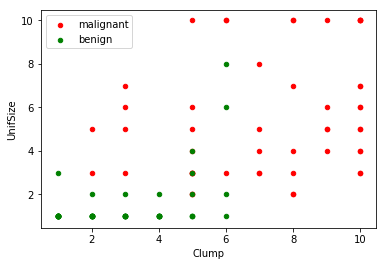

In [9]:
ax = CD[CD['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Red', label='malignant');
CD[CD['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Green', label='benign', ax=ax);
plt.show()

Lets first look at columns data types:

In [11]:
CD.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [13]:
CD = CD[pd.to_numeric(CD['BareNuc'], errors='coerce').notnull()]
CD['BareNuc'] = CD['BareNuc'].astype('int')
CD.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [14]:
feature_df = CD[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [18]:
CD['Class'] = CD['Class'].astype('int')
pred_DF= CD['Class']
y=np.asarray(pred_DF)
y[0:10]

array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2])

## Train/Test dataset

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .2,random_state=4)
print('Train Set',X_train.shape,y_train.shape)
print('Test Set', X_test.shape, y_test.shape)

Train Set (546, 9) (546,)
Test Set (137, 9) (137,)


## Modeling (SVM with Scikit-learn)

The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

    1.Linear
    2.Polynomial
    3.Radial basis function (RBF)
    4.Sigmoid
Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset, we usually choose different functions in turn and compare the results. Let's just use the default, RBF (Radial Basis Function) for this lab.

In [32]:
from sklearn import svm
clf=svm.SVC(kernel='rbf')
clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

After being fitted, the model can then be used to predict new values:

In [34]:
y_pred=clf.predict(X_test)
y_pred[0:5]

array([2, 4, 2, 4, 2])

### Evaluation

In [36]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, y_pred)

0.9635036496350365

### Simpler method of making confusion matrix

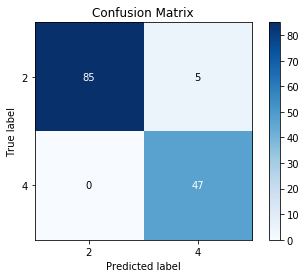

In [38]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred ,labels=[2,4])

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          2       1.00      0.94      0.97        90
          4       0.90      1.00      0.95        47

avg / total       0.97      0.96      0.96       137



In [46]:
from sklearn.metrics import f1_score
F1_score=f1_score(y_test, y_pred, average='weighted')  
print('F1_score is =', F1_score)


F1_score is = 0.9639038982104676
